In [3]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from scipy import integrate
from astropy.coordinates import SkyCoord


# Imports necessary for Source Catalog
from photutils.background import Background2D, MedianBackground
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources
from photutils.segmentation import SourceFinder
from photutils.segmentation import SourceCatalog
from scipy import ndimage
from scipy.ndimage import binary_erosion
from numpy import loadtxt
from photutils.aperture import CircularAperture, aperture_photometry, EllipticalAperture
from astropy.coordinates import match_coordinates_sky

# Imports necessary for visulisation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import simple_norm


from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image

# Imports for cutouts and convolution

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image
import os


from mpdaf.obj import Cube
from mpdaf.drs import PixTable
from astropy.io import fits
from astropy.wcs import WCS as AstropyWCS
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, Spectrum
from scipy.ndimage import gaussian_filter1d

In [4]:
# open fits of spec

file  = '/Users/s2537809/Downloads/jades-gds-wide2-v3_prism-clear_1180_105840.spec.fits'

tab = Table.read(file)

tab

wave,flux,err,sky,path_corr,npix,norm_corr,flux_sum,profile_sum,var_sum
um,uJy,uJy,uJy,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.58,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5836851085753291,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5874378771811705,--,--,--,--,0.0,--,0.0,0.0,0.0
0.591260215571612,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5951542612478814,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5991219350103587,--,--,--,--,0.0,--,0.0,0.0,0.0
0.6031652486825945,-0.06287312187755979,0.031081227872284494,0.005569380851794653,1.2490045579250768,9.0,0.9938756539447828,-0.016783936503509476,1.6232669405298117,0.0057566509133002985
0.6072866429848921,-0.04512899752161912,0.025874233011865228,0.005285534362540315,1.2501859229492622,15.0,0.9947482718453647,-0.09409414335592332,2.4712883688646152,0.0088412597855403


Text(0.5, 1.0, 'Spectrum of Source')

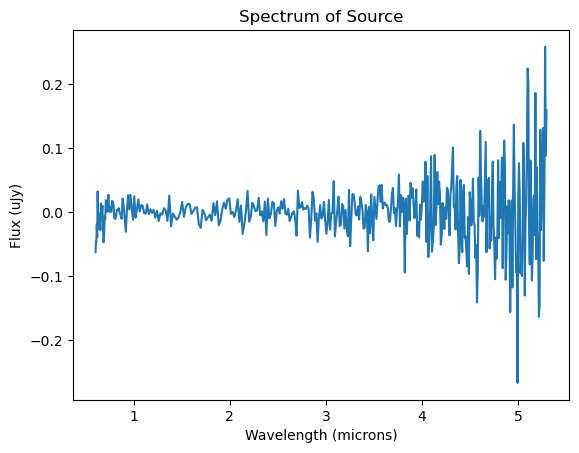

In [5]:
# plot the spectrum

plt.plot(tab['wave'], tab['flux'])
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (uJy)')
plt.title('Spectrum of Source')

INPUTS 

filepath for the catalog of sources

filepath for the cube

check if catalog has redshifts (if only phot broaden range)

In [68]:

# Define the file path
file_path_1 = '/Users/s2537809/MUSE/mosaic_jades_match'

file_path_2 = '/Users/s2537809/MUSE/jades_dr3_prism_public_gs_v1.1.fits'

file_path_3 = '/Users/s2537809/JELS/jels_F466N_detected_source_catalogue_v0.3.fits'     


# Load the catalog
cat3 = Table.read(file_path_1, format='fits')
cat2 = Table.read(file_path_2, format='fits')
cat4 = Table.read(file_path_3, format='fits')

jades = cat2
jels = cat4
mosaic = cat3[cat3['DATASET'] == 'MOSAIC']
print(len(mosaic))
print(len(jades))
print(len(jels))



# Exclude sources without a redshift
mosaic = mosaic[mosaic['z_Spec'] > 0]
jades = jades[jades['z_Spec'] > 0]
#jels = jels[jels['z_Spec'] > 0]
print(len(mosaic))
print(len(jades))
#print(len(jels))

# Print jels column names
print(jels.colnames)

#mosaic = mosaic[mosaic['LYALPHA_EMI_EQW'] < -25]

mosaic['NIRSpec_ID', 'RA', 'DEC', 'z_Spec', 'LYALPHA_EMI_EQW']

jels['z_spec', 'z_peak', 'z1_median', 'z1_min', 'z1_max', 'z1_area', 'z2_median', 'z2_min', 'z2_max', 'z2_area', 'z1_good_peak', 'Emission_line', 'Emission_line_good', 'Emission_line_goodz']

218
2525
6777
161
1559
['ID', 'ra', 'dec', 'F466N_half_light_radius', 'WFC3UV_F275W_300mas_flux', 'WFC3UV_F275W_300mas_fluxerr', 'ACSWFC_F435W_300mas_flux', 'ACSWFC_F435W_300mas_fluxerr', 'ACSWFC_F606W_300mas_flux', 'ACSWFC_F606W_300mas_fluxerr', 'ACSWFC_F814W_300mas_flux', 'ACSWFC_F814W_300mas_fluxerr', 'WFC3IR_F125W_300mas_flux', 'WFC3IR_F125W_300mas_fluxerr', 'WFC3IR_F140W_300mas_flux', 'WFC3IR_F140W_300mas_fluxerr', 'WFC3IR_F160W_300mas_flux', 'WFC3IR_F160W_300mas_fluxerr', 'F090W_300mas_flux', 'F090W_300mas_fluxerr', 'F115W_300mas_flux', 'F115W_300mas_fluxerr', 'F150W_300mas_flux', 'F150W_300mas_fluxerr', 'F200W_300mas_flux', 'F200W_300mas_fluxerr', 'F277W_300mas_flux', 'F277W_300mas_fluxerr', 'F356W_300mas_flux', 'F356W_300mas_fluxerr', 'F410M_300mas_flux', 'F410M_300mas_fluxerr', 'F444W_300mas_flux', 'F444W_300mas_fluxerr', 'F466N_300mas_flux', 'F466N_300mas_fluxerr', 'F470N_300mas_flux', 'F470N_300mas_fluxerr', 'WFC3UV_F275W_600mas_flux', 'WFC3UV_F275W_600mas_fluxerr', 'ACSWFC_

z_spec,z_peak,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,z1_good_peak,Emission_line,Emission_line_good,Emission_line_goodz
float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool
-99.0,9.695,9.719256401062012,9.179999351501465,9.994999885559082,0.6067848205566406,2.6984550952911377,2.2300000190734863,3.179999828338623,0.24631169438362122,True,False,False,False
-99.0,9.67,8.34602165222168,6.230000019073486,9.994999885559082,0.6433996558189392,1.867973804473877,0.9149999618530273,2.799999952316284,0.25330832600593567,False,False,False,False
-99.0,9.53,9.521080017089844,9.260000228881836,9.84999942779541,0.8966976404190063,-99.0,-99.0,-99.0,-99.0,True,False,False,False
-99.0,8.585,8.63597297668457,8.514999389648438,8.90999984741211,0.8325058817863464,8.199429512023926,8.15999984741211,8.234999656677246,0.05977221578359604,True,False,False,False
-99.0,8.425,8.40471076965332,8.369999885559082,8.434999465942383,0.832329273223877,-99.0,-99.0,-99.0,-99.0,True,False,False,False
-99.0,8.365,8.371495246887207,8.304999351501465,8.429999351501465,0.8900573253631592,-99.0,-99.0,-99.0,-99.0,True,True,False,False
-99.0,8.365,8.36519718170166,8.345000267028809,8.389999389648438,0.866460382938385,-99.0,-99.0,-99.0,-99.0,True,True,False,False
-99.0,8.365,8.380970001220703,8.25,8.479999542236328,0.8696638345718384,6.1386260986328125,6.059999942779541,6.199999809265137,0.027790281921625137,True,True,False,False
-99.0,8.365,3.0485246181488037,0.0,6.489999771118164,0.6529122591018677,8.956648826599121,8.0649995803833,9.994999885559082,0.2042507380247116,False,False,False,False


In [2]:


cube = Cube('/Users/s2537809/MUSE/DATACUBE_UDF-MOSAIC.fits')

In [32]:


def get_ra_dec_range(cube):
    # Get the spatial shape of the cube (y, x)
    ny, nx = cube.shape[1], cube.shape[2]

    # Pixel coordinates of the four corners
    corners_pix = [[0, 0], [0, nx-1], [ny-1, 0], [ny-1, nx-1]]

    # Convert pixel coordinates to world coordinates (RA, Dec)
    corners_world = cube.wcs.pix2sky(corners_pix, unit='deg')

    # Extract RA and Dec separately (swap the indices)
    ra_coords = [corner[1] for corner in corners_world]
    dec_coords = [corner[0] for corner in corners_world]

    # Get the min and max RA/Dec
    ra_min, ra_max = min(ra_coords), max(ra_coords)
    dec_min, dec_max = min(dec_coords), max(dec_coords)

    return (ra_min, ra_max), (dec_min, dec_max)

# Call the function on your cube
ra_range, dec_range = get_ra_dec_range(cube)

print(f"RA range: {ra_range}")
print(f"Dec range: {dec_range}")


RA range: (53.11905746329503, 53.20286189611579)
Dec range: (-27.824491111100002, -27.750342513868045)


In [54]:


def extract_source(filepath, ra, dec, redshift, rest_wavelength_range, spatial_extent, NIRSpec_ID, smoothing_sigma=3):
    """
    Extract a 2D stacked image and a 1D spectrum for a given source.

    Parameters:
    - filepath: Path to the FITS file (MUSE data cube)
    - ra: Right Ascension of the source (in degrees)
    - dec: Declination of the source (in degrees)
    - redshift: Redshift of the source
    - rest_wavelength_range: Tuple of (lambda_min, lambda_max) in Angstroms (rest frame)
    - spatial_extent: Half-size of the box in arcseconds around the source

    Returns:
    - stacked_image: 2D stacked image (summed over wavelengths)
    - spectrum: 1D spectrum of the source
    """

    # Load the FITS file and extract WCS using astropy
    with fits.open(filepath) as hdul:
        wcs = AstropyWCS(hdul[1].header)

    # Convert RA/Dec/Wavelength to pixel coordinates
    wavelength = 4750  # Example wavelength (CRVAL3 from header or user-defined)
    pixel_coords = wcs.wcs_world2pix([[ra, dec, wavelength]], 0)

    # Extract pixel coordinates
    pixel_x, pixel_y, _ = pixel_coords[0]
    print(f"Astropy pixel coordinates: ({pixel_x}, {pixel_y})")
    print(f"RA/Dec input (ra, dec): ({ra}, {dec})")

    # Convert pixel coordinates to RA/Dec using pixel_x, pixel_y, and wavelength
    world_coords = wcs.wcs_pix2world(np.array([[pixel_x, pixel_y, wavelength]]), 0)

    # Extract RA and Dec from the result
    ra, dec, _ = world_coords[0]

    print(f"RA: {ra}, Dec: {dec}")

    # Load the cube using mpdaf
    cube = Cube(filepath)

    # Get the wavelength range from the cube
    cube_wave_min = cube.wave.coord().min()
    cube_wave_max = cube.wave.coord().max()
    
    # Convert spatial extent to pixels using pixel scale from cube 
    spatial_extent_pix = int(spatial_extent / cube.wcs.get_step(unit='arcsec')[1])

    # Check if the pixel coordinates are valid
    if np.isnan([pixel_x, pixel_y]).any():
        raise ValueError(f"Invalid RA/Dec coordinates: RA={ra}, Dec={dec} fall outside the cube field of view.")

    x_center, y_center = int(pixel_x), int(pixel_y)

    # Calculate the observed wavelength range
    lambda_min_obs = rest_wavelength_range[0] * (1 + redshift)
    lambda_max_obs = rest_wavelength_range[1] * (1 + redshift)

    # Check if the wavelength range is outside the cube range
    if lambda_min_obs > cube_wave_max or lambda_max_obs < cube_wave_min:
        print(f"Warning: Observed wavelength range ({lambda_min_obs:.2f} - {lambda_max_obs:.2f} Å) "
              f"is outside the cube's wavelength range ({cube_wave_min:.2f} - {cube_wave_max:.2f} Å).")
        return None, None, None  # or handle the case accordingly
    
    # Clamp the wavelength range to the cube's limits
    lambda_min_obs = max(lambda_min_obs, cube_wave_min)
    lambda_max_obs = min(lambda_max_obs, cube_wave_max)

    # Find the indices corresponding to the wavelength range in the cube
    wave_start = np.argmin(np.abs(cube.wave.coord() - lambda_min_obs))
    wave_end = np.argmin(np.abs(cube.wave.coord() - lambda_max_obs))

    # Extract the subcube around the source in pixel coordinates
    x_slice = slice(max(0, x_center - spatial_extent_pix), min(cube.shape[2], x_center + spatial_extent_pix))
    y_slice = slice(max(0, y_center - spatial_extent_pix), min(cube.shape[1], y_center + spatial_extent_pix))

    # Ensure the extracted region is exactly 30x30 by clamping if needed
    if (x_slice.stop - x_slice.start) != 30 or (y_slice.stop - y_slice.start) != 30:
        raise ValueError("The extracted region is not 30x30 pixels.")


    subcube = cube[wave_start:wave_end, y_slice, x_slice]

    # Stack the wavelengths to create a 2D image
    stacked_image = subcube.data.sum(axis=0)
    spectrum_data = subcube.data.mean(axis=(1, 2))


    print(f"Rest wavelength range: {rest_wavelength_range}")
    print(f"Redshift: {redshift}")

    print("Cube wavelength range:", cube.wave.coord().min(), cube.wave.coord().max())
    print("Requested wavelength range:", lambda_min_obs, lambda_max_obs)

    # This is where the None type error is - try excluding anything beforecalling coord()
    spectrum_wave = subcube.wave.coord()
    if spectrum_wave is not None and spectrum_data is not None:
        spectrum = Spectrum(lamb=spectrum_wave, flux=spectrum_data)
    else:
        raise ValueError("Invalid wavelength or flux data in subcube.")

    # Convert spectrum wavelength to rest frame
    spectrum_wave_rest = spectrum_wave / (1 + redshift)

    # Extract RA/Dec coordinates at the corners and center of the stacked image
    ny, nx = stacked_image.shape
    ra_min, dec_min = wcs.wcs_pix2world([[x_slice.start, y_slice.start, wavelength]], 0)[0][:2]
    ra_max, dec_max = wcs.wcs_pix2world([[x_slice.stop-1, y_slice.stop-1, wavelength]], 0)[0][:2]

    # Set the input RA/Dec as the center for plotting
    ra_center, dec_center = ra, dec
    print(f"RA/Dec at center of image (input): {ra_center:.3f}, {dec_center:.3f}")
    print(f"RA/Dec at center of image (wcs): {wcs.wcs_pix2world([[x_center, y_center, wavelength]], 0)[0][:2]}")

    # Calculate the RMS of the stacked image
    rms = np.sqrt(np.mean(stacked_image**2))

    # Set the color scale to 3 times the RMS value
    vmin = -1 * rms
    vmax = 4 * rms

    """  
  
    # Print basic statistics of the stacked image
    print("Min value:", np.min(stacked_image))
    print("Max value:", np.max(stacked_image))
    print("Mean value:", np.mean(stacked_image))
    print("RMS:", rms)

    

    # Plot the stacked 2D image with RMS scaling
    plt.figure(figsize=(6, 6))
    im = plt.imshow(stacked_image, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im, label=r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', shrink=0.7)
    plt.title(f'Stacked 2D Image of Source {NIRSpec_ID} at RA={ra:.3f}, Dec={dec:.3f}', fontsize=10, pad=12)

    # Correct RA/Dec ticks on the axes using input RA/Dec as the center
    plt.xticks([0, nx//2, nx-1], [f'{ra_min:.3f}', f'{ra_center:.3f}', f'{ra_max:.3f}'])
    plt.yticks([0, ny//2, ny-1], [f'{dec_min:.3f}', f'{dec_center:.3f}', f'{dec_max:.3f}'])

    plt.xlabel('Right Ascension (deg)')
    plt.ylabel('Declination (deg)')
    #plt.gca().invert_xaxis()  # RA decreases to the right
    plt.tight_layout()
    plt.show()


    # Apply Gaussian smoothing to the spectrum
    smoothed_flux = gaussian_filter1d(spectrum_data, sigma=smoothing_sigma)

    # Plot the 1D spectrum
    plt.figure(figsize=(12, 4))
    plt.plot(spectrum_wave_rest, spectrum_data, color='green', alpha=0.4, label='Source Spectrum')
    plt.plot(spectrum_wave_rest, smoothed_flux, color='black', alpha=0.8, label=f'Smoothed Spectrum (σ={smoothing_sigma})')
    plt.xlim([spectrum_wave_rest[0], spectrum_wave_rest[-1]])  # Ensure the spectrum touches both ends
    plt.xlabel(r'Restframe Wavelength (Å)', fontsize=12)
    plt.ylabel(r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=12)
    plt.title(f'Spectrum of Source {NIRSpec_ID} at z_spec={redshift:.3f}', fontsize=12, pad=10)
    plt.minorticks_on()
    plt.tick_params(axis='both', which='both', direction='in', length=8, width=1, colors='black', grid_color='black', grid_alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    """
    return stacked_image, spectrum_data, spectrum_wave_rest


In [60]:
# Example source index from the mosaic catalog
source_list = np.linspace(0, 1558, 1557, dtype=int)

# Initialize dictionaries to store the outputs
stacked_images = {}
spectrum_data_dict = {}
spectrum_wave_rest_dict = {}

# Counters for successful and excluded sources
successful_sources = 0
excluded_sources = 0

# Lists to accumulate spectra
all_spectra = []
all_wavelengths = []

for i, source in enumerate(source_list):
    # Load source details from the mosaic catalog
    NIRSpec_ID = jades['NIRSpec_ID'][source]
    ra_center = jades['RA_NIRCam'][source]    
    dec_center = jades['Dec_NIRCam'][source]
    redshift = jades['z_Spec'][source]  
    rest_wavelength_range = (1212, 1220)  
    spatial_extent = 3  # Spatial extent in arcseconds

    # Filepath to the MUSE data cube FITS file
    filepath = '/Users/s2537809/MUSE/DATACUBE_UDF-MOSAIC.fits'
    

    # Extract the source for each source in the source list
    try:
        stacked_image, spectrum_data, spectrum_wave_rest = extract_source(
            filepath, ra_center, dec_center, redshift, rest_wavelength_range, spatial_extent, NIRSpec_ID, smoothing_sigma=5
        )
        
        # Check if the result is valid (i.e., not None)
        if stacked_image is not None and spectrum_data is not None and spectrum_wave_rest is not None:
            # Store the results in the dictionaries with unique keys
            stacked_images[f'image_{i+1}'] = stacked_image
            spectrum_data_dict[f'data_{i+1}'] = spectrum_data
            spectrum_wave_rest_dict[f'data_{i+1}'] = spectrum_wave_rest
            successful_sources += 1  # Increment successful counter
            print(f"Shape of image_{i+1}: {stacked_image.shape}")

            # Append spectra and wavelengths for stacking
            all_spectra.append(spectrum_data)
            all_wavelengths.append(spectrum_wave_rest)
        else:
            print(f"Source {NIRSpec_ID} (index {i+1}) excluded due to out-of-range wavelength.")
            excluded_sources += 1  # Increment excluded counter
    except Exception as e:
        # Handle any errors that occur during extraction
        print(f"Error processing source {NIRSpec_ID} (index {i+1}): {e}")
        excluded_sources += 1  # Increment excluded counter

# Print out the number of successful and excluded sources
print(f"Number of successfully processed sources: {successful_sources}")
print(f"Number of excluded sources: {excluded_sources}")





/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 490 (index 1): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (83.33238551217866, 372.9404502549155)
RA/Dec input (ra, dec): (53.17489609283017, -27.805995666439653)
RA: 53.174896092830174, Dec: -27.805995666439653
Rest wavelength range: (1212, 1220)
Redshift: 4.281985
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6401.76582 6444.021699999999
RA/Dec at center of image (input): 53.175, -27.806
RA/Dec at center of image (wcs): [ 53.17487209 -27.80604685]
Shape of image_2: (30, 30)
Astropy pixel coordinates: (124.23085519864061, 409.1039315807146)
RA/Dec input (ra, dec): (53.17450665731265, -27.802982303685546)
RA: 53.17450665731265, Dec: -27.802982303685553
Source 1444 (index 3) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (87.40803878979393, 478.8391436588183)
RA/Dec input (

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 2.98412
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 4828.7534399999995 4860.6264
RA/Dec at center of image (input): 53.168, -27.812
RA/Dec at center of image (wcs): [ 53.16795676 -27.81242584]
Shape of image_50: (30, 30)
Astropy pixel coordinates: (644.5194119454666, 613.742019524869)
RA/Dec input (ra, dec): (53.15882380819009, -27.775192897599336)
RA: 53.15882380819009, Dec: -27.775192897599347
Rest wavelength range: (1212, 1220)
Redshift: 3.441507
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5383.106484 5418.63854
RA/Dec at center of image (input): 53.159, -27.775
RA/Dec at center of image (wcs): [ 53.15881687 -27.77524284]
Shape of image_51: (30, 30)
Astropy pixel coordinates: (745.0274501166011, -373.1654735156462)
RA/Dec input (ra, dec): (53.112652063185756, -27.812192792773097)
RA: 53.11265206318575, Dec: -27.812192792773097
Error processing source 5076 (index 52): The extracted region is not 3

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (810.8616902465658, -353.2862840160036)
RA/Dec input (ra, dec): (53.11041614475809, -27.80892391745738)
RA: 53.1104161447581, Dec: -27.80892391745739
Error processing source 6002 (index 84): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (178.78642296330736, 340.3862850990344)
RA/Dec input (ra, dec): (53.16907248184955, -27.80379166331159)
RA: 53.16907248184955, Dec: -27.80379166331158
Source 6017 (index 85) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (236.03695258610753, 279.3953413389535)
RA/Dec input (ra, dec): (53.16383715914243, -27.80418162387028)
RA: 53.16383715914243, Dec: -27.804181623870292
Source 6022 (index 86) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (78.07264444089499, 457.3966751893252)
RA/Dec input (ra, dec): (53.17869053240587, -27.802703973470514)
RA: 53.17869053240587, Dec: -27.80270397347052
Source 6112 (index 87) excluded due to out-of-range wavelength.
Astropy pixel

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.255817
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5158.050204 5192.096740000001
RA/Dec at center of image (input): 53.135, -27.799
RA/Dec at center of image (wcs): [ 53.13476401 -27.79936754]
Shape of image_95: (30, 30)
Astropy pixel coordinates: (352.1253219821039, 303.8175644821948)
RA/Dec input (ra, dec): (53.15944533471944, -27.798857826561054)
RA: 53.15944533471944, Dec: -27.79885782656104
Source 6291 (index 96) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (-20.36759997812258, 655.5126476523037)
RA/Dec input (ra, dec): (53.19160983234617, -27.798181953294772)
RA: 53.19160983234617, Dec: -27.79818195329477
Source 6341 (index 97) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (288.1944275368818, 147.31947755688992)
RA/Dec input (ra, dec): (53.15585188517562, -27.807695398463963)
RA: 53.15585188517562, Dec: -27.80769539846397
Source 6349 (index 98) excluded due to out-of-

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 5.864251
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8319.472212 8374.38622
RA/Dec at center of image (input): 53.178, -27.803
RA/Dec at center of image (wcs): [ 53.17751019 -27.80254125]
Shape of image_250: (30, 30)
Astropy pixel coordinates: (652.9105995903033, -52.170424164553495)
RA/Dec input (ra, dec): (53.130445956572, -27.802369921075496)
RA: 53.130445956572, Dec: -27.802369921075496
Error processing source 9697 (index 251): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (261.83129025251367, 405.15011582857665)
RA/Dec input (ra, dec): (53.16791791121454, -27.79803077749828)
RA: 53.16791791121454, Dec: -27.79803077749828
Rest wavelength range: (1212, 1220)
Redshift: 3.457985
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5403.0778199999995 5438.7417
RA/Dec at center of image (input): 53.168, -27.798
RA/Dec at center of image (wcs): [ 53.1679504  -27.79806788]
Shape of image_

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 11200 (index 297) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (758.2332842868981, -220.16934308438945)
RA/Dec input (ra, dec): (53.11846871843877, -27.80538730272204)
RA: 53.11846871843877, Dec: -27.805387302722043
Source 11236 (index 298) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (644.836847175535, -109.9928836410692)
RA/Dec input (ra, dec): (53.128391927352396, -27.805056803003087)
RA: 53.1283919273524, Dec: -27.805056803003094
Source 11238 (index 299) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (666.6314477101735, -120.59949243402748)
RA/Dec input (ra, dec): (53.12692903442572, -27.804684141398972)
RA: 53.12692903442572, Dec: -27.804684141398972
Source 11252 (index 300) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (816.3535643190319, -144.43945140569943)
RA/Dec input (ra, dec): (53.1189407572018, -27.800100325588797)
RA: 53.1189407572018, Dec: -27.800100325588794
Source 11340 (ind

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 12242 (index 329) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1006.4110096378807, 458.92189498662685)
RA/Dec input (ra, dec): (53.135434269178845, -27.768129159978294)
RA: 53.135434269178845, Dec: -27.76812915997829
Source 12259 (index 330) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (422.3537663439142, 979.994941023835)
RA/Dec input (ra, dec): (53.184577179022604, -27.768329027042927)
RA: 53.184577179022604, Dec: -27.768329027042927
Source 12271 (index 331) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (955.7890185411011, 536.413516765997)
RA/Dec input (ra, dec): (53.141052087316076, -27.766812679095473)
RA: 53.141052087316076, Dec: -27.766812679095462
Source 12281 (index 332) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1067.7394263610283, 414.8768509286153)
RA/Dec input (ra, dec): (53.1307224623021, -27.767666760387097)
RA: 53.130722462302096, Dec: -27.76766676038709
Source 12305 (i

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 5.986226
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8467.305912 8523.19572
RA/Dec at center of image (input): 53.173, -27.767
RA/Dec at center of image (wcs): [ 53.17260497 -27.76708972]
Shape of image_459: (30, 30)
Astropy pixel coordinates: (704.3410146628211, -184.84895104903237)
RA/Dec input (ra, dec): (53.12246832654241, -27.805933686425117)
RA: 53.12246832654242, Dec: -27.805933686425117
Error processing source 14137 (index 460): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (862.2907978795554, 768.0148116878825)
RA/Dec input (ra, dec): (53.15514493238849, -27.76072805367863)
RA: 53.15514493238849, Dec: -27.760728053678648
Rest wavelength range: (1212, 1220)
Redshift: 6.31427
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8864.89524 8923.409399999999
RA/Dec at center of image (input): 53.155, -27.761
RA/Dec at center of image (wcs): [ 53.15515788 -27.76073948]
Shape of ima

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Error processing source 15357 (index 478): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1440.71408524933, 186.02587586691817)
RA/Dec input (ra, dec): (53.103707881649726, -27.763241215436043)
RA: 53.103707881649726, Dec: -27.763241215436036
Error processing source 15361 (index 479): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1307.0237637044897, 337.592391482085)
RA/Dec input (ra, dec): (53.11631333448186, -27.76195827795394)
RA: 53.11631333448186, Dec: -27.761958277953944
Source 15362 (index 480) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1641.5400213482867, 126.82900801357752)
RA/Dec input (ra, dec): (53.09185439824576, -27.75821415634847)
RA: 53.09185439824576, Dec: -27.75821415634847
Error processing source 15368 (index 481): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1483.78462493566, 365.79270597962767)
RA/Dec input (ra, dec): (53.10925483409475, -27.754220566928833)
RA: 53.109

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Error processing source 16385 (index 493): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1453.220290411362, 41.57397536591603)
RA/Dec input (ra, dec): (53.09705260382876, -27.768737115072863)
RA: 53.09705260382875, Dec: -27.76873711507286
Error processing source 16402 (index 494): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1348.1141123645914, 192.10226370086284)
RA/Dec input (ra, dec): (53.10828196838104, -27.76643452623436)
RA: 53.10828196838104, Dec: -27.766434526234356
Error processing source 16413 (index 495): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1666.2024671838537, -46.84172876618684)
RA/Dec input (ra, dec): (53.08340361354721, -27.764462896344554)
RA: 53.08340361354722, Dec: -27.764462896344554
Error processing source 16418 (index 496): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1445.0555799744693, 232.87135922698863)
RA/Dec input (ra, dec): (53.105474414679364, -27.7611

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 17245 (index 530) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (992.117737953181, 258.09116983538496)
RA/Dec input (ra, dec): (53.12766100272298, -27.776950185266273)
RA: 53.12766100272298, Dec: -27.776950185266276
Error processing source 17251 (index 531): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1626.1352115130687, 675.919199639068)
RA/Dec input (ra, dec): (53.11564900829395, -27.736127377761346)
RA: 53.11564900829395, Dec: -27.736127377761346
Error processing source 17258 (index 532): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1001.9667213297121, 250.65004094175956)
RA/Dec input (ra, dec): (53.126888799079865, -27.776891073949216)
RA: 53.126888799079865, Dec: -27.77689107394921
Error processing source 17260 (index 533): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1969.872335276629, 396.74908738523806)
RA/Dec input (ra, dec): (53.087891144394504, -27.734862850491794)
RA: 53

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  

Source 17435 (index 546) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 17504 (index 547): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 17509 (index 548): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 17527 (index 549): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (668.4349877410378, 575.4872582990846)
RA/Dec input (ra, dec): (53.15610054974031, -27.775883129930218)
RA: 53.15610054974031, Dec: -27.77588312993021
Rest wavelength range: (1212, 1220)
Redshift: 6.101533511321096
Cube wavelength range: 4750.0 9350.0
Requested wavele

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 32015 (index 592) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (241.38123163628777, -248.26012545738973)
RA/Dec input (ra, dec): (53.1414081842651, -27.825765950649345)
RA: 53.14140818426512, Dec: -27.825765950649345
Source 32426 (index 593) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (290.3965666921952, -287.8442726827641)
RA/Dec input (ra, dec): (53.137456114260566, -27.825577448237592)
RA: 53.13745611426054, Dec: -27.8255774482376
Error processing source 32628 (index 594): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (33.10088117414695, -49.40852210872676)
RA/Dec input (ra, dec): (53.15949010950094, -27.8253004457734)
RA: 53.159490109500936, Dec: -27.825300445773404
Error processing source 32779 (index 595): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (-129.80351401215563, 102.87839799057004)
RA/Dec input (ra, dec): (53.17349630077698, -27.825068609041626)
RA: 53.17349630077697, De

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 36424 (index 621) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (46.398013846070576, 131.60191551879703)
RA/Dec input (ra, dec): (53.16647771867123, -27.817332980693195)
RA: 53.16647771867124, Dec: -27.81733298069318
Rest wavelength range: (1212, 1220)
Redshift: 3.0672533176897367
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 4929.511021039961 4962.049047581479
RA/Dec at center of image (input): 53.166, -27.817
RA/Dec at center of image (wcs): [ 53.166471   -27.81737263]
Shape of image_622: (30, 30)
Astropy pixel coordinates: (0.8000698880666781, 175.15580919294797)
RA/Dec input (ra, dec): (53.17043684778, -27.817229724322644)
RA: 53.17043684778, Dec: -27.817229724322637
Source 36452 (index 623) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (812.0046174345562, -221.70987864181177)
RA/Dec input (ra, dec): (53.11589503824698, -27.803451162957)
RA: 53.11589503824698, Dec: -27.803451162956996
Source 36458 (index 624) exc

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 39435 (index 686) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1430.6129124351492, -11.855822313960466)
RA/Dec input (ra, dec): (53.09586085875148, -27.771782837727905)
RA: 53.09586085875148, Dec: -27.771782837727912
Source 39612 (index 687) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (548.7611189950998, -140.7697087374925)
RA/Dec input (ra, dec): (53.13158141123504, -27.809899721259896)
RA: 53.131581411235025, Dec: -27.80989972125989
Error processing source 39617 (index 688): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1465.7495844542598, -36.63164202069285)
RA/Dec input (ra, dec): (53.093180629178974, -27.77149823743704)
RA: 53.09318062917895, Dec: -27.771498237437026
Source 39620 (index 689) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1395.1154212814272, 48.92373140227243)
RA/Dec input (ra, dec): (53.10007143551656, -27.770595059992935)
RA: 53.100071435516554, Dec: -27.770595059

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.515364355730018
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6684.621599144782 6728.744513990622
RA/Dec at center of image (input): 53.181, -27.804
RA/Dec at center of image (wcs): [ 53.18129141 -27.80405705]
Shape of image_756: (30, 30)
Astropy pixel coordinates: (1121.052363883717, 825.9362869280003)
RA/Dec input (ra, dec): (53.145507364924434, -27.74871666716399)
RA: 53.145507364924434, Dec: -27.748716667163986
Source 42202 (index 757) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1312.3662392495619, 655.4817842669935)
RA/Dec input (ra, dec): (53.12942260921621, -27.74863916788409)
RA: 53.129422609216206, Dec: -27.748639167884082
Source 42227 (index 758) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1355.7904989865153, 618.7837777961722)
RA/Dec input (ra, dec): (53.12585539353092, -27.748539115390972)
RA: 53.12585539353092, Dec: -27.748539115390972
Source 42242 (index 75

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 43375 (index 801) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (96.49608889694453, 485.87861342581454)
RA/Dec input (ra, dec): (53.1790273296152, -27.80084316363726)
RA: 53.1790273296152, Dec: -27.800843163637264
Source 43415 (index 802) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (857.4749037212342, -197.31460448360576)
RA/Dec input (ra, dec): (53.11479917631864, -27.800753299089866)
RA: 53.114799176318655, Dec: -27.800753299089873
Source 43457 (index 803) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (872.6876036677609, 1224.6900912288056)
RA/Dec input (ra, dec): (53.173842491735584, -27.741487194691654)
RA: 53.173842491735584, Dec: -27.741487194691647
Source 43459 (index 804) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 43607 (index 805): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cu

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 44037 (index 817) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 44068 (index 818): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (218.7329931653091, 414.2296198844168)
RA/Dec input (ra, dec): (53.170311024904, -27.799257951775758)
RA: 53.170311024904, Dec: -27.79925795177575
Rest wavelength range: (1212, 1220)
Redshift: 4.368065584158257
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6506.095487999808 6549.040012673074
RA/Dec at center of image (input): 53.170, -27.799
RA/Dec at center of image (wcs): [ 53.17033559 -27.79929468]
Shape of image_819: (30, 30)
Astropy pixel coordinates: (870.9469786517222, 1321.837292108667)
RA/Dec input (ra, dec): (53.17800349347379, -27.73754072381766)
RA: 53.17800349347379, Dec: -27.737540723817656
Source 44074 (index 820) excluded due to out-of-range wavelengt

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.554932
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5520.577584 5557.01704
RA/Dec at center of image (input): 53.134, -27.796
RA/Dec at center of image (wcs): [ 53.13356584 -27.79639388]
Shape of image_854: (30, 30)
Astropy pixel coordinates: (1957.685186551025, 494.2385714654622)
RA/Dec input (ra, dec): (53.09255639757021, -27.731293416247897)
RA: 53.09255639757021, Dec: -27.731293416247897
Source 45260 (index 855) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (201.304575888558, 504.85146725352416)
RA/Dec input (ra, dec): (53.17493241051897, -27.796164121081834)
RA: 53.17493241051897, Dec: -27.796164121081834
Source 45263 (index 856) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (834.1746941709187, -65.21959906600266)
RA/Dec input (ra, dec): (53.121439667640175, -27.796167961168667)
RA: 53.12143966764019, Dec: -27.796167961168674
Error processing source 45267 (index 857): Th

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 2.9920371404515147
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 4838.349014227236 4870.285311350848
RA/Dec at center of image (input): 53.178, -27.796
RA/Dec at center of image (wcs): [ 53.17798716 -27.79559563]
Shape of image_868: (30, 30)
Astropy pixel coordinates: (213.28505408173635, 511.23433487301577)
RA/Dec input (ra, dec): (53.174641419479315, -27.79545526241141)
RA: 53.17464141947932, Dec: -27.795455262411398
Source 45494 (index 869) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 45532 (index 870): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 45548 (index 871): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordi

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  

Rest wavelength range: (1212, 1220)
Redshift: 3.7751545642767264
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5787.487331903392 5825.688568417606
RA/Dec at center of image (input): 53.184, -27.794
RA/Dec at center of image (wcs): [ 53.18357019 -27.79450999]
Shape of image_882: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 45806 (index 883): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 45831 (index 884): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 45900 (index 885): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (575.9256201830817, 215.764

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.0837745030637365
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 4949.5346977132485 4982.2048937377585
RA/Dec at center of image (input): 53.153, -27.794
RA/Dec at center of image (wcs): [ 53.15258902 -27.79398054]
Shape of image_888: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 46002 (index 889): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 46051 (index 890): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (878.4797517228213, -48.594477521683665)
RA/Dec input (ra, dec): (53.120071462504605, -27.79383417029577)
RA: 53.1200714625046, Dec: -27.79383417029576
Error processing source 46101 (index 891): The extracted region is not 30x30 pixels.
A

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  

Error processing source 46674 (index 903): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (832.5302106205799, 50.238980984925455)
RA/Dec input (ra, dec): (53.126369905473176, -27.79146368413577)
RA: 53.12636990547318, Dec: -27.79146368413578
Rest wavelength range: (1212, 1220)
Redshift: 4.81721
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7050.45852 7096.9962000000005
RA/Dec at center of image (input): 53.126, -27.791
RA/Dec at center of image (wcs): [ 53.1263846  -27.79149326]
Shape of image_904: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 47038 (index 905): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (163.17319878533795, 664.8516877344945)
RA/Dec input (ra, dec): (53.183434735821336, -27.790974890945957)
RA: 53.18343473582134, Dec: -27.790974890945954
Source 47100 

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.363689276615524
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5288.791403258016 5323.700917470939
RA/Dec at center of image (input): 53.147, -27.790
RA/Dec at center of image (wcs): [ 53.14686288 -27.7903904 ]
Shape of image_914: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 47412 (index 915): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (131.1901669931646, 716.8421498816809)
RA/Dec input (ra, dec): (53.18711181797683, -27.79001677040128)
RA: 53.187111817976835, Dec: -27.790016770401273
Source 47436 (index 916) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (321.7270042186331, 552.286259745469)
RA/Dec input (ra, dec): (53.17130502344597, -27.789729425906746)
RA: 53.17130502344597, Dec: -27.78972942590674


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.20945
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5101.853400000001 5135.529
RA/Dec at center of image (input): 53.171, -27.790
RA/Dec at center of image (wcs): [ 53.17132693 -27.78976827]
Shape of image_917: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 47568 (index 918): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 47713 (index 919): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 47806 (index 920): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (595.9037191201251, 332.9924379252157)
RA/Dec i

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  

Rest wavelength range: (1212, 1220)
Redshift: 6.632051
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 9250.045812 9311.102219999999
RA/Dec at center of image (input): 53.152, -27.788
RA/Dec at center of image (wcs): [ 53.1516109  -27.78796785]
Shape of image_933: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 48272 (index 934): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (621.1869354846679, 330.3316928762085)
RA/Dec input (ra, dec): (53.14800339450707, -27.78776032346325)
RA: 53.14800339450707, Dec: -27.78776032346325
Source 48275 (index 935) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 48370 (index 936): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.6447538516395688
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5629.441668187158 5666.599699000274
RA/Dec at center of image (input): 53.195, -27.787
RA/Dec at center of image (wcs): [ 53.19495975 -27.78713496]
Shape of image_938: (30, 30)
Astropy pixel coordinates: (555.7759355916444, 404.90098478791947)
RA/Dec input (ra, dec): (53.154189385116986, -27.78711378760262)
RA: 53.154189385116986, Dec: -27.78711378760262
Source 48548 (index 939) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 48553 (index 940): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 48576 (index 941): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordin

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 5.522401463582206
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7905.150573861633 7957.329785570291
RA/Dec at center of image (input): 53.147, -27.786
RA/Dec at center of image (wcs): [ 53.14666383 -27.78626919]
Shape of image_945: (30, 30)
Astropy pixel coordinates: (870.3118653375187, 154.13078521058995)
RA/Dec input (ra, dec): (53.12897409956237, -27.785770600348727)
RA: 53.12897409956238, Dec: -27.785770600348737
Source 49104 (index 946) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (839.2336969428995, 185.53254826195425)
RA/Dec input (ra, dec): (53.13174391783341, -27.78563010320787)
RA: 53.131743917833404, Dec: -27.785630103207858
Source 49116 (index 947) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (607.3183330875235, 399.7941348759584)
RA/Dec input (ra, dec): (53.151569640401334, -27.78540840282814)
RA: 53.151569640401334, Dec: -27.785408402828153
Rest wavelength range:

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.3240648735842653
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5240.76662678413 5275.3591457728035
RA/Dec at center of image (input): 53.142, -27.785
RA/Dec at center of image (wcs): [ 53.14167952 -27.78469009]
Shape of image_953: (30, 30)
Astropy pixel coordinates: (633.2867429002778, 399.01139505885544)
RA/Dec input (ra, dec): (53.150325006574775, -27.784475262704902)
RA: 53.150325006574775, Dec: -27.784475262704895
Rest wavelength range: (1212, 1220)
Redshift: 5.261455040679021
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7588.883509302973 7638.975149628405
RA/Dec at center of image (input): 53.150, -27.784
RA/Dec at center of image (wcs): [ 53.15033791 -27.78448639]
Shape of image_954: (30, 30)
Astropy pixel coordinates: (304.3630237106707, 704.1608137805373)
RA/Dec input (ra, dec): (53.178496396351214, -27.784104039385692)
RA: 53.178496396351214, Dec: -27.784104039385696
Rest wavelength range: (

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.468203436229072
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5415.4625647096345 5451.208192199467
RA/Dec at center of image (input): 53.133, -27.780
RA/Dec at center of image (wcs): [ 53.13326176 -27.77992566]
Shape of image_974: (30, 30)
Astropy pixel coordinates: (346.1481235269985, 776.4315362700235)
RA/Dec input (ra, dec): (53.17958245228578, -27.779566845135154)
RA: 53.17958245228578, Dec: -27.779566845135154
Source 51489 (index 975) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (843.4595149688074, 347.7909158746)
RA/Dec input (ra, dec): (53.13836617056152, -27.778775384131748)
RA: 53.13836617056151, Dec: -27.778775384131738
Rest wavelength range: (1212, 1220)
Redshift: 5.934938056722997
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8405.144924748272 8460.624429202056
RA/Dec at center of image (input): 53.138, -27.779
RA/Dec at center of image (wcs): [ 53.13835437 -27.77882

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 5.927657374974141
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8396.320738468658 8451.74199746845
RA/Dec at center of image (input): 53.152, -27.778
RA/Dec at center of image (wcs): [ 53.15216038 -27.7784621 ]
Shape of image_981: (30, 30)
Astropy pixel coordinates: (684.5112073422802, 499.9697349287783)
RA/Dec input (ra, dec): (53.15217727314808, -27.778403061846593)
RA: 53.15217727314808, Dec: -27.7784030618466
Rest wavelength range: (1212, 1220)
Redshift: 5.929543102505812
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8398.606240237044 8454.04258505709
RA/Dec at center of image (input): 53.152, -27.778
RA/Dec at center of image (wcs): [ 53.15216038 -27.7784621 ]
Shape of image_982: (30, 30)
Astropy pixel coordinates: (335.2696943149885, 822.7098819647043)
RA/Dec input (ra, dec): (53.18203427061113, -27.778060288146165)
RA: 53.18203427061113, Dec: -27.778060288146165
Source 52069 (index 983) excluded 

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.135818801007577
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6224.6123868211835 6265.698937229244
RA/Dec at center of image (input): 53.146, -27.773
RA/Dec at center of image (wcs): [ 53.14648697 -27.77349274]
Shape of image_994: (30, 30)
Astropy pixel coordinates: (718.8908893527399, 592.0209755511811)
RA/Dec input (ra, dec): (53.15444102568445, -27.773324786326025)
RA: 53.15444102568445, Dec: -27.773324786326025
Rest wavelength range: (1212, 1220)
Redshift: 5.922
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8389.464 8444.84
RA/Dec at center of image (input): 53.154, -27.773
RA/Dec at center of image (wcs): [ 53.15448171 -27.77335877]
Shape of image_995: (30, 30)
Astropy pixel coordinates: (790.0097731449181, 535.2418254640944)
RA/Dec input (ra, dec): (53.14873704800427, -27.77302471969799)
RA: 53.14873704800427, Dec: -27.773024719697993
Rest wavelength range: (1212, 1220)
Redshift: 3.3273584127807

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.7748
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6999.0576 7045.256
RA/Dec at center of image (input): 53.167, -27.760
RA/Dec at center of image (wcs): [ 53.16692241 -27.75972201]
Shape of image_1042: (30, 30)
Astropy pixel coordinates: (997.1876546537491, 692.4469433462576)
RA/Dec input (ra, dec): (53.14567696648673, -27.758832427440026)
RA: 53.14567696648673, Dec: -27.758832427440034
Source 59206 (index 1043) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (734.0070732734983, 933.4473415781979)
RA/Dec input (ra, dec): (53.16807970361478, -27.75866698687698)
RA: 53.16807970361478, Dec: -27.75866698687697
Error processing source 59282 (index 1044): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1648.2059938636394, -98.71504359448664)
RA/Dec input (ra, dec): (53.0820619607201, -27.767272747996984)
RA: 53.0820619607201, Dec: -27.767272747996984
Source 59405 (index 1045) exclude

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.975974
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6030.880488 6070.68828
RA/Dec at center of image (input): 53.149, -27.806
RA/Dec at center of image (wcs): [ 53.14887818 -27.8056781 ]
Shape of image_1117: (30, 30)
Astropy pixel coordinates: (672.931026997381, -151.3409276286022)
RA/Dec input (ra, dec): (53.12534269983758, -27.805718724149216)
RA: 53.12534269983758, Dec: -27.805718724149216
Source 108494 (index 1118) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (135.29872063562323, 334.47757126480764)
RA/Dec input (ra, dec): (53.170854057299366, -27.805652129782448)
RA: 53.170854057299366, Dec: -27.805652129782445
Source 108526 (index 1119) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (283.1750636580571, 204.48020856005562)
RA/Dec input (ra, dec): (53.15848857322513, -27.805522173096833)
RA: 53.15848857322513, Dec: -27.805522173096822
Source 108585 (index 1120) excluded d

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.237908
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6348.344496 6390.24776
RA/Dec at center of image (input): 53.158, -27.798
RA/Dec at center of image (wcs): [ 53.15767122 -27.79795433]
Shape of image_1317: (30, 30)
Astropy pixel coordinates: (-80.27917944754137, 20.942478329901867)
RA/Dec input (ra, dec): (53.167740299391916, -27.82661069847053)
RA: 53.16774029939192, Dec: -27.82661069847054
Error processing source 10000042 (index 1318): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (36.10106986477475, -28.840299102174292)
RA/Dec input (ra, dec): (53.16021464262892, -27.824339757981296)
RA: 53.1602146426289, Dec: -27.824339757981306
Source 10000081 (index 1319) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10000098 (index 1320): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.24218
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5141.5221599999995 5175.459599999999
RA/Dec at center of image (input): 53.172, -27.812
RA/Dec at center of image (wcs): [ 53.17175719 -27.81201347]
Shape of image_1327: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10000756 (index 1328): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (-21.74695652748213, 367.6755314851086)
RA/Dec input (ra, dec): (53.17958006297323, -27.810118767347312)
RA: 53.17958006297324, Dec: -27.81011876734731
Error processing source 10000811 (index 1329): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (50.964927746597006, 321.8439035142297)
RA/Dec input (ra, dec): (53.174259777902456, -27.809308507044136)
RA: 53.174259777902456, Dec: -27.809308507044136


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.509949171305895
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6678.058395622744 6722.137988993191
RA/Dec at center of image (input): 53.174, -27.809
RA/Dec at center of image (wcs): [ 53.17426936 -27.80937922]
Shape of image_1330: (30, 30)
Astropy pixel coordinates: (262.0443115059776, 152.1449595747578)
RA/Dec input (ra, dec): (53.15727522974107, -27.808468343915425)
RA: 53.15727522974107, Dec: -27.808468343915422
Source 10000929 (index 1331) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (292.3170040139327, 133.0054086926874)
RA/Dec input (ra, dec): (53.15505784540137, -27.808133070420077)
RA: 53.15505784540137, Dec: -27.808133070420084
Source 10000966 (index 1332) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (504.24287952504534, -25.56492229824361)
RA/Dec input (ra, dec): (53.13850193548892, -27.806799713876398)
RA: 53.13850193548892, Dec: -27.806799713876405
Error processi

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.4307023783467594
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5370.011282556273 5405.456901583047
RA/Dec at center of image (input): 53.171, -27.802
RA/Dec at center of image (wcs): [ 53.17136218 -27.80160729]
Shape of image_1335: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10001694 (index 1336): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (335.9019952395144, 299.94682396218093)
RA/Dec input (ra, dec): (53.1600398287646, -27.79962073223873)
RA: 53.1600398287646, Dec: -27.79962073223874
Source 10001761 (index 1337) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (19.03643167575514, 582.3804452406968)
RA/Dec input (ra, dec): (53.18669782741579, -27.799737394720243)
RA: 53.186697827415784, Dec: -27.799737394720257


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.69514
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6902.50968 6948.0708
RA/Dec at center of image (input): 53.187, -27.800
RA/Dec at center of image (wcs): [ 53.18668354 -27.79975446]
Shape of image_1338: (30, 30)
Astropy pixel coordinates: (705.7796390709858, -12.237975648021028)
RA/Dec input (ra, dec): (53.129657644253406, -27.798755740778738)
RA: 53.12965764425341, Dec: -27.79875574077875
Source 10001843 (index 1339) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (373.01715790262114, 299.78637548539115)
RA/Dec input (ra, dec): (53.158300886528224, -27.798247591222594)
RA: 53.158300886528224, Dec: -27.798247591222584
Rest wavelength range: (1212, 1220)
Redshift: 4.770522
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6993.8726639999995 7040.03684
RA/Dec at center of image (input): 53.158, -27.798
RA/Dec at center of image (wcs): [ 53.15826864 -27.79828069]
Shape of image_1340: (

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.622521
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5602.495452 5639.47562
RA/Dec at center of image (input): 53.149, -27.783
RA/Dec at center of image (wcs): [ 53.1486442  -27.78291259]
Shape of image_1351: (30, 30)
Astropy pixel coordinates: (698.3811196176047, 872.4669031436613)
RA/Dec input (ra, dec): (53.16718028906414, -27.762508995389442)
RA: 53.16718028906414, Dec: -27.762508995389428
Rest wavelength range: (1212, 1220)
Redshift: 4.789752
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7017.179424 7063.49744
RA/Dec at center of image (input): 53.167, -27.763
RA/Dec at center of image (wcs): [ 53.16717846 -27.76254244]
Shape of image_1352: (30, 30)
Astropy pixel coordinates: (716.7796800018183, 785.4679976577617)
RA/Dec input (ra, dec): (53.162667053830866, -27.765416925767525)
RA: 53.162667053830866, Dec: -27.765416925767514
Rest wavelength range: (1212, 1220)
Redshift: 2.98726
Cube wavelength 

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 4.025480600450544
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 6090.88248774606 6131.086332549664
RA/Dec at center of image (input): 53.164, -27.819
RA/Dec at center of image (wcs): [ 53.1640427  -27.81917674]
Shape of image_1357: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10004748 (index 1358): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10004765 (index 1359): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10004809 (index 1360): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (449.05770258425

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 2.990413062415357
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 4836.380631647413 4868.303936146735
RA/Dec at center of image (input): 53.148, -27.802
RA/Dec at center of image (wcs): [ 53.14837553 -27.80168894]
Shape of image_1361: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10004862 (index 1362): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10004986 (index 1363): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (905.3322674430865, 346.25026594221777)
RA/Dec input (ra, dec): (53.13541480269072, -27.776538382903592)
RA: 53.13541480269072, Dec: -27.776538382903592


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 3.331656948456119
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 5249.968221528817 5284.621477116466
RA/Dec at center of image (input): 53.135, -27.777
RA/Dec at center of image (wcs): [ 53.13541979 -27.77656107]
Shape of image_1364: (30, 30)
Astropy pixel coordinates: (210.7711254941016, 333.8022359884014)
RA/Dec input (ra, dec): (53.16730288066768, -27.80287455915018)
RA: 53.16730288066768, Dec: -27.80287455915017
Rest wavelength range: (1212, 1220)
Redshift: 5.82083787231477
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8266.855501245502 8321.42220422402
RA/Dec at center of image (input): 53.167, -27.803
RA/Dec at center of image (wcs): [ 53.16730516 -27.80293635]
Shape of image_1365: (30, 30)
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10005217 (index 1366): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of 

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Rest wavelength range: (1212, 1220)
Redshift: 5.270081
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7599.338172000001 7649.498820000001
RA/Dec at center of image (input): 53.158, -27.771
RA/Dec at center of image (wcs): [ 53.15759068 -27.77105121]
Shape of image_1367: (30, 30)
Astropy pixel coordinates: (475.77671737392154, 212.24185464866997)
RA/Dec input (ra, dec): (53.14982597877699, -27.7980414108449)
RA: 53.14982597877699, Dec: -27.79804141084489
Source 10005367 (index 1368) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (667.5851816602473, 735.953840310477)
RA/Dec input (ra, dec): (53.16288222015503, -27.769289907677265)
RA: 53.16288222015503, Dec: -27.769289907677265
Rest wavelength range: (1212, 1220)
Redshift: 6.622576403018016
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 9238.562600457835 9299.54321168198
RA/Dec at center of image (input): 53.163, -27.769
RA/Dec at center of image (wcs): [ 53.16286945 -27.76935104]


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Error processing source 10005766 (index 1372): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (491.81716683739035, -50.80484761947184)
RA/Dec input (ra, dec): (53.13802080914276, -27.808303591144558)
RA: 53.13802080914275, Dec: -27.80830359114455
Source 10005874 (index 1373) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (494.63678488660867, 53.38698341394324)
RA/Dec input (ra, dec): (53.14226897141919, -27.80389783262381)
RA: 53.14226897141919, Dec: -27.803897832623814
Source 10006044 (index 1374) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (279.29354131083915, 263.2655790805016)
RA/Dec input (ra, dec): (53.161140326392115, -27.803239525326116)
RA: 53.161140326392115, Dec: -27.803239525326113
Source 10006084 (index 1375) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (881.6473366854378, 944.5468683023297)
RA/Dec input (ra, dec): (53.161657901946626, -27.752720

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (489.85364084741934, 188.2900766902121)
RA/Dec input (ra, dec): (53.14816237883137, -27.79850681604776)
RA: 53.14816237883137, Dec: -27.79850681604776
Source 10008794 (index 1393) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (83.8084474526946, 671.42057157723)
RA/Dec input (ra, dec): (53.18741522755659, -27.79365334792829)
RA: 53.1874152275566, Dec: -27.793653347928277
Source 10008989 (index 1394) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (367.4591761935904, 244.50952721049353)
RA/Dec input (ra, dec): (53.15623719623767, -27.800736266105744)
RA: 53.15623719623767, Dec: -27.800736266105744
Rest wavelength range: (1212, 1220)
Redshift: 5.058669
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 7343.106828 7391.57618
RA/Dec at center of image (input): 53.156, -27.801
RA/Dec at center of image (wcs): [ 53.15623721 -27.80077437]
Shape of image_1395: (30, 30)
Astropy pixel coordinates: (831.03404570066

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (665.3865691253275, -291.78108850811475)
RA/Dec input (ra, dec): (53.11979020214413, -27.811795746244172)
RA: 53.11979020214413, Dec: -27.811795746244172
Source 10011032 (index 1427) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (-252.81056859358975, 542.9305955597686)
RA/Dec input (ra, dec): (53.19773153092622, -27.81146941895706)
RA: 53.19773153092622, Dec: -27.811469418957056
Source 10011037 (index 1428) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (-240.75150563761864, 610.4721073081272)
RA/Dec input (ra, dec): (53.20000622758013, -27.808232044118085)
RA: 53.20000622758013, Dec: -27.808232044118085
Source 10011141 (index 1429) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (751.5222597394719, -180.8804300805182)
RA/Dec input (ra, dec): (53.120433666420645, -27.80401532089475)
RA: 53.12043366642063, Dec: -27.804015320894745
Source 10011258 (index 1430) excluded due to out-of-range wavelength

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  

Error processing source 10011980 (index 1442): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (736.1558453675065, 538.6955560480264)
RA/Dec input (ra, dec): (53.15139483815218, -27.77488433936922)
RA: 53.15139483815218, Dec: -27.774884339369226
Source 10011987 (index 1443) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1065.7141919531987, 254.0066410718728)
RA/Dec input (ra, dec): (53.12405609485099, -27.77438198525699)
RA: 53.124056094850985, Dec: -27.774381985256984
Source 10011990 (index 1444) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10011997 (index 1445): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (1106.5191297098386, 210.4003209459798)
RA/Dec input (ra, dec): (53.120319861804816, -27.774664327945963)
RA: 53.120319861804816, 

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 10012477 (index 1457) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1125.8783439086396, 466.0242566825568)
RA/Dec input (ra, dec): (53.13015985925506, -27.76339371867191)
RA: 53.13015985925505, Dec: -27.763393718671896
Source 10012488 (index 1458) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1127.4364542620192, 468.7658131148301)
RA/Dec input (ra, dec): (53.13020238754341, -27.76322262046942)
RA: 53.13020238754341, Dec: -27.763222620469424
Source 10012493 (index 1459) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1247.5989138487746, 371.44326781755376)
RA/Dec input (ra, dec): (53.120507625329346, -27.76277111913388)
RA: 53.120507625329346, Dec: -27.762771119133884
Source 10012511 (index 1460) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1253.1782749390852, 401.47368731182695)
RA/Dec input (ra, dec): (53.121509439916615, -27.761324187174534)
RA: 53.1215094399166, Dec: -27.76132418717452


/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10013523 (index 1473): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (-259.69181171406944, 715.5647507407033)
RA/Dec input (ra, dec): (53.205305658180215, -27.804595784944247)
RA: 53.20530565818021, Dec: -27.804595784944254
Error processing source 10013534 (index 1474): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (766.6514432908467, -76.23087599502117)
RA/Dec input (ra, dec): (53.12412726097762, -27.79913345423605)
RA: 53.124127260977616, Dec: -27.79913345423605
Error processing source 10013545 (index 1475): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (769.9419903333174, 279.9590733988713)
RA/Dec input (ra, dec): (53.13894550270779, -27.784308910961567)
RA: 53.1389455027078, Dec: -27.784308910961578
Rest wavelength range: (1212, 1220)
Redshift: 3.9385676775937473
C

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (1214.0315995300684, 188.2285642544469)
RA/Dec input (ra, dec): (53.114372980988804, -27.771581091540007)
RA: 53.11437298098881, Dec: -27.771581091540018
Error processing source 10015344 (index 1493): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10016186 (index 1494): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (1157.2468688664017, 157.55185795006122)
RA/Dec input (ra, dec): (53.115732281841474, -27.77495898252373)
RA: 53.11573228184147, Dec: -27.774958982523728
Error processing source 10016374 (index 1495): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (1351.7820523710932, 378.48460217478987)
RA/Dec input (ra, dec): (53.115944395613376, -27.75860604835106)
RA: 53.115944395613376, Dec: -27.758606048351048
Source 10016442 (index 1496) excluded due to out-of-range wav

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Source 10040620 (index 1505) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1339.9467170563225, 372.834992669216)
RA/Dec input (ra, dec): (53.11625895154354, -27.75927936833422)
RA: 53.11625895154354, Dec: -27.75927936833422
Source 10040868 (index 1506) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (1021.2833974414857, 897.3085789402234)
RA/Dec input (ra, dec): (53.1531595443126, -27.749479564080097)
RA: 53.1531595443126, Dec: -27.749479564080094
Error processing source 10042096 (index 1507): The extracted region is not 30x30 pixels.
Astropy pixel coordinates: (nan, nan)
RA/Dec input (ra, dec): (--, --)
RA: nan, Dec: nan
Error processing source 10056849 (index 1508): Invalid RA/Dec coordinates: RA=nan, Dec=nan fall outside the cube field of view.
Astropy pixel coordinates: (848.1278527613838, -208.8457349617665)
RA/Dec input (ra, dec): (53.11475047373151, -27.801576820604332)
RA: 53.11475047373151, Dec: -27.801576820604332
Error processing so

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (48.6580368332248, 549.5243574346989)
RA/Dec input (ra, dec): (53.18393460694379, -27.799993175832416)
RA: 53.183934606943794, Dec: -27.799993175832412
Source 20046019 (index 1519) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (73.37450941810516, 579.6241806097308)
RA/Dec input (ra, dec): (53.18404552943961, -27.79783165544056)
RA: 53.18404552943961, Dec: -27.79783165544056
Source 20046866 (index 1520) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (171.07754514061995, 517.0296674672267)
RA/Dec input (ra, dec): (53.1768549801641, -27.796784814274776)
RA: 53.1768549801641, Dec: -27.796784814274776
Source 20047266 (index 1521) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (186.46550516256033, 680.6668110346793)
RA/Dec input (ra, dec): (53.18301199673961, -27.789456145959594)
RA: 53.18301199673961, Dec: -27.789456145959594
Source 20049790 (index 1522) excluded due to out-of-range wavelength.
Astrop

/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)
/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/astropy/wcs/wcs.py:1537: UserWarning: Warning: converting a masked element to nan.
  xy = np.asarray(xy)


Astropy pixel coordinates: (23.97193555642076, 160.40156717911364)
RA/Dec input (ra, dec): (53.16873503310763, -27.8169775555817)
RA: 53.16873503310764, Dec: -27.816977555581694
Source 20100293 (index 1534) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (188.5938601017031, 352.64722493579546)
RA/Dec input (ra, dec): (53.16912995334219, -27.802920877045608)
RA: 53.16912995334219, Dec: -27.802920877045608
Source 20110306 (index 1535) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (835.4827693906185, -172.83827543394153)
RA/Dec input (ra, dec): (53.11685430599838, -27.80056100739213)
RA: 53.11685430599837, Dec: -27.80056100739213
Source 20111790 (index 1536) excluded due to out-of-range wavelength.
Astropy pixel coordinates: (734.5645490107727, 500.93712089193986)
RA/Dec input (ra, dec): (53.1498824882679, -27.776502245242426)
RA: 53.14988248826789, Dec: -27.776502245242405
Source 20128771 (index 1537) excluded due to out-of-range wavelength.
Astr

Number of stacked images: 260


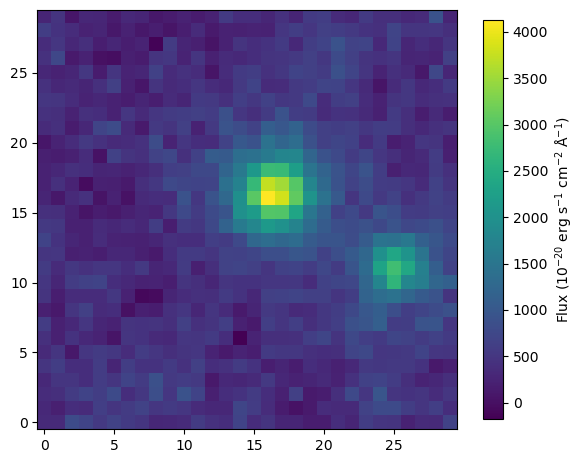

Combined stacked image saved to .pdf


In [61]:
from matplotlib.backends.backend_pdf import PdfPages

# Combine stacked images
all_stacked_images = []

for key in stacked_images:
    all_stacked_images.append(stacked_images[key])

# Print how many images are being stacked
num_images = len(all_stacked_images)
print(f"Number of stacked images: {num_images}")

# Sum all the stacked images
combined_image = np.sum(all_stacked_images, axis=0)

# Ask the user for the output PDF filename
output_pdf_name = input("alljades_1220range_stack") + ".pdf"

# Save the combined image to a PDF
with PdfPages(output_pdf_name) as pdf:
    # Plot the combined stacked 2D image with RMS scaling
    plt.figure(figsize=(6, 6))
    im = plt.imshow(combined_image, origin='lower', cmap='viridis')
    cbar = plt.colorbar(im, label=r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', shrink=0.7)
    plt.tight_layout()
    pdf.savefig()
    plt.show()

print(f"Combined stacked image saved to {output_pdf_name}")



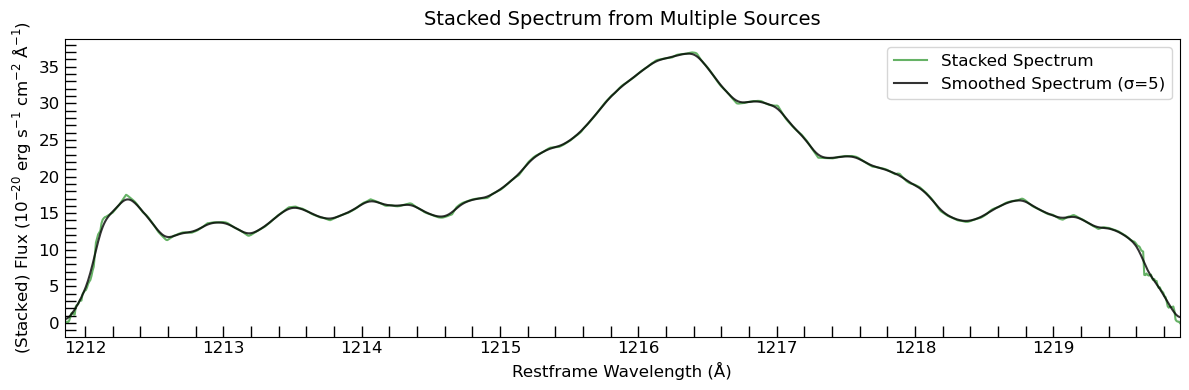

In [63]:
from scipy.interpolate import interp1d
import numpy as np

# Extract all wavelengths and combine into one array to find the common wavelength range
all_wavelengths_flat = np.concatenate(list(spectrum_wave_rest_dict.values()))

# Define a common wavelength grid using the overall min and max wavelengths
common_wave_rest = np.linspace(np.min(all_wavelengths_flat), np.max(all_wavelengths_flat), num=1000)

# Initialize a list to store the resampled spectra
resampled_spectra = []

# Iterate over the dictionary with matching keys
for key in spectrum_data_dict.keys():
    try:
        # Retrieve original wavelength and flux values for each spectrum
        original_wave = spectrum_wave_rest_dict[key]
        original_flux = spectrum_data_dict[key]

        # Interpolation function for the current spectrum
        interp_func = interp1d(original_wave, original_flux, kind='linear', bounds_error=False, fill_value=0)

        # Resample the flux to the common wavelength grid
        resampled_flux = interp_func(common_wave_rest)

        # Append the resampled flux to the list
        resampled_spectra.append(resampled_flux)

    except KeyError as e:
        print(f"KeyError: {e} - skipping this entry")
        continue

# Stack the resampled spectra by summing them
stacked_flux = np.sum(resampled_spectra, axis=0)
average_flux = stacked_flux / len(resampled_spectra)  # Averaging the flux if needed


# Apply Gaussian smoothing to the spectrum
smoothing_sigma = 5
smoothed_flux = gaussian_filter1d(stacked_flux, sigma=smoothing_sigma)


# Plot the stacked spectrum
plt.figure(figsize=(12, 4))
plt.plot(common_wave_rest, stacked_flux, color='green', alpha=0.6, label='Stacked Spectrum')
plt.plot(common_wave_rest, smoothed_flux, color='black', alpha=0.8, label=f'Smoothed Spectrum (σ={smoothing_sigma})')
plt.xlabel(r'Restframe Wavelength (Å)', fontsize=12)
plt.ylabel(r'(Stacked) Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=12)
plt.title('Stacked Spectrum from Multiple Sources', fontsize=14, pad=10)
plt.xlim([common_wave_rest[0], common_wave_rest[-1]])  # Ensure the spectrum touches both ends
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', length=8, width=1, colors='black', grid_color='black', grid_alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

